In [1]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

In [2]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(faces.data)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150)
pca.fit(X)


def min_var(v, exp_var):
    acc = 0
    i = 0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


min_var(0.95, pca.explained_variance_ratio_)

121

In [5]:
pca = PCA(n_components=121)
pca.fit(X)

PCA(n_components=121)

In [6]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=2, algorithm="brute", metric="euclidean").fit(X)

distances, indices = nbrs.kneighbors(X)

In [7]:
indices

array([[  0,   2],
       [  1,   4],
       [  2,   0],
       [  3, 398],
       [  4,   1],
       [  5,   3],
       [  6,   0],
       [  7, 115],
       [  8,   6],
       [  9,   4],
       [ 10,  19],
       [ 11,  15],
       [ 12,  13],
       [ 13,  17],
       [ 14,  11],
       [ 15,  18],
       [ 16,  19],
       [ 17,  19],
       [ 18,  15],
       [ 19,  17],
       [ 20,  21],
       [ 21,  22],
       [ 22,  21],
       [ 23,  24],
       [ 24,  23],
       [ 25, 255],
       [ 26,  27],
       [ 27,  26],
       [ 28,  29],
       [ 29,  28],
       [ 30,  37],
       [ 31, 149],
       [ 32,  37],
       [ 33,  34],
       [ 34,  33],
       [ 35, 396],
       [ 36,  33],
       [ 37,  30],
       [ 38,  31],
       [ 39,  34],
       [ 40,  43],
       [ 41,  42],
       [ 42,  41],
       [ 43,  40],
       [ 44,  45],
       [ 45,  44],
       [ 46,  43],
       [ 47,  45],
       [ 48,  45],
       [ 49, 394],
       [ 50,  52],
       [ 51,  50],
       [ 52,

# 109 es el vecino más cercano de 100

In [8]:
from sklearn.neighbors import KDTree

kdt = KDTree(X, metric="euclidean")
dist, ind = kdt.query(X, k=2)

In [9]:
ind[100]

array([100, 109])

In [10]:
from sklearn.neighbors import BallTree

ball = BallTree(X, metric="euclidean")
dist, ind = ball.query(X, k=2)

In [11]:
ind[100]


array([100, 109])

In [12]:
y = faces.target

In [13]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=5)
clf = nbrs.fit(X_train, y_train)

In [15]:
clf.score(X_test, y_test)

0.7375

In [16]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         3
           2       0.33      1.00      0.50         1
           3       0.50      0.67      0.57         3
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.60      0.75         5
           8       1.00      1.00      1.00         2
           9       1.00      0.33      0.50         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         2
          14       0.33      1.00      0.50         1
          15       0.50      0.50      0.50         2
          16       0.50      0.50      0.50         2
          17       0.67    

/Users/vicentelavagnino/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vicentelavagnino/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vicentelavagnino/.pyenv/versions/3.12.7/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [17]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5, metric="euclidean")
lof.fit_predict(X)
scores = lof.negative_outlier_factor_

In [18]:
scores

array([-1.0178907 , -1.0416229 , -1.0061591 , -1.0343789 , -1.2045448 ,
       -1.0706599 , -0.9776772 , -1.113753  , -1.1305805 , -1.167516  ,
       -1.0068266 , -1.0354905 , -0.97419393, -0.9958447 , -1.0228927 ,
       -0.96656114, -1.0240085 , -1.0127542 , -0.9949163 , -1.0031083 ,
       -1.0319158 , -1.0527922 , -1.0766599 , -1.0855343 , -1.1083066 ,
       -1.1080978 , -1.0999663 , -1.0379708 , -1.0287349 , -1.0255213 ,
       -1.1683718 , -1.1657736 , -1.1744707 , -0.98062897, -0.99386704,
       -1.0541143 , -1.0595901 , -1.2016617 , -1.2128528 , -1.0639699 ,
       -1.0285541 , -1.0241077 , -1.0634749 , -1.0376853 , -0.9816238 ,
       -1.0246477 , -1.019563  , -1.0733092 , -1.0352135 , -1.0094968 ,
       -1.0730655 , -1.1369623 , -1.1044323 , -0.99435014, -0.9967047 ,
       -0.99482334, -0.9900858 , -1.0087986 , -1.0473955 , -0.98300743,
       -1.024049  , -1.1180162 , -1.2110697 , -1.1585557 , -1.0112888 ,
       -1.2088722 , -1.082669  , -1.0207329 , -1.1893526 , -1.09

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins="auto", rwidth=0.85)
    plt.grid(axis="y")
    plt.xlabel("LOF")
    plt.ylabel("Frequency")
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

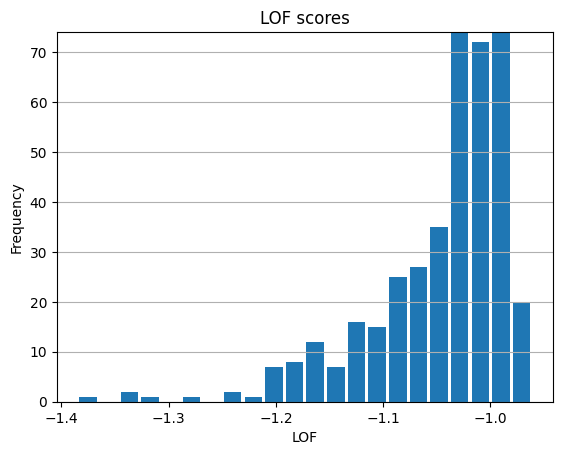

In [20]:
plot_hist(scores, "LOF scores")

In [21]:
def lof_threshold(v, scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points) / N
    return threshold

lof_threshold(-1.25, scores)

0.0125

In [22]:
lof = LocalOutlierFactor(n_neighbors=5, metric="euclidean", contamination=0.0125)
labels = lof.fit_predict(X)

In [23]:
labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [24]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

import numpy as np

# Get the predicted labels and targets
labels = lof.fit_predict(X)  # -1 = outlier, 1 = inlier
targets = faces.target  # person IDs, range 0–39

# Initialize counter array
outliers_per_person = np.zeros(40, dtype=int)

# Go through outlier indices
outlier_indices = np.where(labels == -1)[0]
for idx in outlier_indices:
    person_id = targets[idx]
    outliers_per_person[person_id] += 1

print(outliers_per_person)
for id, count in enumerate(outliers_per_person):
    if count > 0:
        print(f"Person {id} has {count} outliers")


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0
 0 0 0]
Person 7 has 1 outliers
Person 19 has 1 outliers
Person 31 has 1 outliers
Person 34 has 2 outliers


In [25]:
outlier_indices

array([ 78, 195, 316, 340, 341])

In [26]:
lof.negative_outlier_factor_

array([-1.0178907 , -1.0416229 , -1.0061591 , -1.0343789 , -1.2045448 ,
       -1.0706599 , -0.9776772 , -1.113753  , -1.1305805 , -1.167516  ,
       -1.0068266 , -1.0354905 , -0.97419393, -0.9958447 , -1.0228927 ,
       -0.96656114, -1.0240085 , -1.0127542 , -0.9949163 , -1.0031083 ,
       -1.0319158 , -1.0527922 , -1.0766599 , -1.0855343 , -1.1083066 ,
       -1.1080978 , -1.0999663 , -1.0379708 , -1.0287349 , -1.0255213 ,
       -1.1683718 , -1.1657736 , -1.1744707 , -0.98062897, -0.99386704,
       -1.0541143 , -1.0595901 , -1.2016617 , -1.2128528 , -1.0639699 ,
       -1.0285541 , -1.0241077 , -1.0634749 , -1.0376853 , -0.9816238 ,
       -1.0246477 , -1.019563  , -1.0733092 , -1.0352135 , -1.0094968 ,
       -1.0730655 , -1.1369623 , -1.1044323 , -0.99435014, -0.9967047 ,
       -0.99482334, -0.9900858 , -1.0087986 , -1.0473955 , -0.98300743,
       -1.024049  , -1.1180162 , -1.2110697 , -1.1585557 , -1.0112888 ,
       -1.2088722 , -1.082669  , -1.0207329 , -1.1893526 , -1.09

In [27]:
for i, (score, label) in enumerate(zip(scores, faces.target)):
    print(f"Index: {i}, Person ID: {label}, LOF score: {score}")

Index: 0, Person ID: 0, LOF score: -1.0178906917572021
Index: 1, Person ID: 0, LOF score: -1.0416228771209717
Index: 2, Person ID: 0, LOF score: -1.0061590671539307
Index: 3, Person ID: 0, LOF score: -1.0343788862228394
Index: 4, Person ID: 0, LOF score: -1.2045447826385498
Index: 5, Person ID: 0, LOF score: -1.070659875869751
Index: 6, Person ID: 0, LOF score: -0.9776772260665894
Index: 7, Person ID: 0, LOF score: -1.1137529611587524
Index: 8, Person ID: 0, LOF score: -1.1305805444717407
Index: 9, Person ID: 0, LOF score: -1.1675159931182861
Index: 10, Person ID: 1, LOF score: -1.006826639175415
Index: 11, Person ID: 1, LOF score: -1.0354905128479004
Index: 12, Person ID: 1, LOF score: -0.9741939306259155
Index: 13, Person ID: 1, LOF score: -0.9958447217941284
Index: 14, Person ID: 1, LOF score: -1.022892713546753
Index: 15, Person ID: 1, LOF score: -0.9665611386299133
Index: 16, Person ID: 1, LOF score: -1.0240085124969482
Index: 17, Person ID: 1, LOF score: -1.012754201889038
Index: